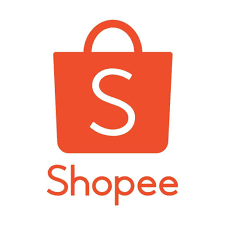</a>

<h1 align="center"><font size="5">Project: Comments analysis - Predict "sentiment" of comments from shopee book comments</font></h1>
<h2 align="center"><font size="5">Deadline: 2023-04-20 00:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Chú ý: Học viên tạo folder trên Google Drive theo cú pháp: MDS5_HoVaTen_Thi, upload toàn bộ bài thi lên >> Share folder này cho thầy theo email: datafarmer2019@gmail.com để thầy chấm điểm. Yêu cầu: Nộp bài đúng deadline. Bài làm giống nhau bị trừ điểm.

### Your information:
- Fullname: Nguyễn Lương Minh
- Date of birth: 11/11/1991
- Place of birth: Bến Tre
- Email: lminhtm@gmail.com
- Mobile phone: 0395666208

In this notebook, we practice all the knowledge and skills that we have learned in this course (MDS5: Data pre-processing and Analysis)

We apply the **Logistic Regression Algorithm** to predict: **"sentiment of comments from shopee books comments"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: shopee_book_comment.csv

#### Data dictionary:
1. user_comment: comment of user
2. user_rating: sactify of user (rating from 1 to 5, 5 is the best, 1 is worst)
    * If rating greater than 4 --> user like product
    * If rating lower than 2 --> user not like product

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Logistic Regression
    - Model Evaluation using Test set
    - Report

### Import library

In [136]:
import pandas as pd
import numpy as np
import regex
from underthesea import sent_tokenize
import string
from processor.text import TextProcessor
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics
from analysis.analyzer import TTTH_Analyzer
from processor.feature import FeatureProcessor
from sklearn.naive_bayes import MultinomialNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
_analyzer = TTTH_Analyzer()
_processor = FeatureProcessor()
text_processor = TextProcessor()

### Read and overview dataset

In [5]:
df = pd.read_csv('input_data/shoppee_book_comments.csv', )
df.head()

,page_id,pro_idx,item_id,shop_id,product_name,category_name,number_rating,page_no,user_id,user_name,comment_id,created_time,user_rating,user_comment,user_tag_content
0,68,4099,7533954553,91303830,Sách Ehon - Combo 4 cuốn Bé thích ăn món nào n...,Children's Books,70.0,0.0,507517476.0,vumaihuong2020,5761481675,1.629633e+09,5.0,Bé nhà mình rất thích và cũng rất hợp tác với ...,|
1,40,2418,1270721073,55485833,Sách - Thơ Từ Những Hạt Mầm (trọn bộ 5 cuốn),Comics & Manga,68.0,3.0,27904753.0,s*****9,5695767420,1.629092e+09,5.0,Sách đóng gói cẩn thận . Rất xinh đáng mua cho...,|
2,63,3792,4341233746,272432350,[Mã LIFEMC2010 giảm 10% đơn 150k] Sách - Tiếng...,Language Learning & Dictionaries,65.0,1.0,77586247.0,_*****_,6029765403,1.631949e+09,5.0,"Nội dung sách hay, triển khai kiến thức rõ ràn...",|
3,58,3481,3414234213,162534564,Sách - Vòng quanh thế giới - bộ 30 quyển,Comics & Manga,82.0,1.0,42853902.0,lyngocdinh,5093646849,1.623765e+09,5.0,Giao hàng lâu .sách bị cong gãy vài cuốnnnnnnn...,|
4,61,3691,2854091277,46725128,Sách - Kỹ Năng Đi Trước Đam Mê (Tái Bản),Business & Investment,136.0,5.0,35438981.0,nhiyoyo,5136979761,1.624160e+09,5.0,"Ok đẹp lắm nak shop ,giao hàng đúng mẫu , đóng...",|


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           2000 non-null   int64  
 1   pro_idx           2000 non-null   int64  
 2   item_id           2000 non-null   int64  
 3   shop_id           2000 non-null   int64  
 4   product_name      2000 non-null   object 
 5   category_name     2000 non-null   object 
 6   number_rating     2000 non-null   float64
 7   page_no           2000 non-null   float64
 8   user_id           2000 non-null   float64
 9   user_name         2000 non-null   object 
 10  comment_id        2000 non-null   int64  
 11  created_time      2000 non-null   float64
 12  user_rating       2000 non-null   float64
 13  user_comment      1799 non-null   object 
 14  user_tag_content  2000 non-null   object 
dtypes: float64(5), int64(5), object(5)
memory usage: 234.5+ KB


`user_comment` có giá trị null

### Pre-processing data

In [44]:
df = df[['user_comment', 'user_rating']]
df.head()

,user_comment,user_rating
0,Bé nhà mình rất thích và cũng rất hợp tác với ...,5.0
1,Sách đóng gói cẩn thận . Rất xinh đáng mua cho...,5.0
2,"Nội dung sách hay, triển khai kiến thức rõ ràn...",5.0
3,Giao hàng lâu .sách bị cong gãy vài cuốnnnnnnn...,5.0
4,"Ok đẹp lắm nak shop ,giao hàng đúng mẫu , đóng...",5.0


#### Check duplicate and remove

In [38]:
df.duplicated().sum()

246

In [39]:
df.drop_duplicates(inplace=True)

#### Check missing values

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_comment  1752 non-null   object 
 1   user_rating   1754 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.1+ KB


In [47]:
df.dropna(inplace=True)

#### Convert to lower case

In [48]:
df.user_comment = df.user_comment.str.lower()

#### Remove `'` 

In [57]:
df.user_comment = df.user_comment.str.replace("'","")

In [81]:
df.user_comment[df.user_comment.str.contains("'", regex=False)]

Series([], Name: user_comment, dtype: object)

#### Convert multiple dot to 1 dot

In [65]:
df.user_comment = df.user_comment.apply(lambda x: regex.sub(r'\.+', '.', x))

In [80]:
df.user_comment[df.user_comment.str.contains('...', regex=False)]

Series([], Name: user_comment, dtype: object)

#### Cleaning data

In [13]:
text_processor = TextProcessor()

In [79]:
df.user_comment = df.user_comment.apply(lambda x: text_processor.process_text(x))
df.user_comment

0       bé nhà mình rất thích và cũng rất hợp tác với ...
1       sách đóng gói cẩn thận . rất xinh đáng mua cho...
2       nội dung sách hay, triển khai kiến thức rõ ràn...
3       giao hàng lâu .sách bị cong gãy vài cuốnnnnnnn...
4       ok đẹp lắm nak shop ,giao hàng đúng mẫu , đóng...
                              ...                        
1993    mua đợt săn sale ko ở nhà kiểm soát đc, chưa g...
1995    đóng gói sản phẩm sơ sài không có lớp bảo vệ.s...
1996    sách fake , hoặc sách cũ bị bung hết keo lần đ...
1997    shop khinh người, giao toàn hàng đã qua sử dụn...
1998    giấy siêu mỏng, mở trang này mà thấy luôn ở tr...
Name: user_comment, Length: 1752, dtype: object

#### Convert to unicode

In [82]:
df.user_comment = df.user_comment.apply(lambda x: text_processor.covert_unicode(x))
df.user_comment

0       bé nhà mình rất thích và cũng rất hợp tác với ...
1       sách đóng gói cẩn thận . rất xinh đáng mua cho...
2       nội dung sách hay, triển khai kiến thức rõ ràn...
3       giao hàng lâu .sách bị cong gãy vài cuốnnnnnnn...
4       ok đẹp lắm nak shop ,giao hàng đúng mẫu , đóng...
                              ...                        
1993    mua đợt săn sale ko ở nhà kiểm soát đc, chưa g...
1995    đóng gói sản phẩm sơ sài không có lớp bảo vệ.s...
1996    sách fake , hoặc sách cũ bị bung hết keo lần đ...
1997    shop khinh người, giao toàn hàng đã qua sử dụn...
1998    giấy siêu mỏng, mở trang này mà thấy luôn ở tr...
Name: user_comment, Length: 1752, dtype: object

#### Process post_tagging

In [83]:
df.user_comment = df.user_comment.apply(lambda x: text_processor.process_postag_thesea(x))
df.user_comment

0        rất thích cũng rất hợp_tác cảm_ơn shop rất nhiều
1                              rất xinh đáng mua trẻ nghe
2       kiến_thức dễ hiểu tuy_nhiên giao khá lâu vẫn c...
3                                    giao lâu bị cong gãy
4                               đẹp lắm giao đúng tot mua
                              ...                        
1993    mua săn ko kiểm_soát chưa giao đã giao đã báo ...
1995    đóng sản_phẩm không_có bảo bị móp rất xấumong_...
1996                           cũ bị bung hết cũng là mua
1997    giao toàn đã qua mưa sale chẳng đổi trả làm tố...
1998                                    mỏng mở thấy luôn
Name: user_comment, Length: 1752, dtype: object

### Feature Engineering

In [127]:
df['label'] = df.user_rating.apply(lambda x: 1 if x >= 4 else 0 if x <= 2 else 2)

In [128]:
df.head()

,user_comment,user_rating,label
0,rất thích cũng rất hợp_tác cảm_ơn shop rất nhiều,5.0,1
1,rất xinh đáng mua trẻ nghe,5.0,1
2,kiến_thức dễ hiểu tuy_nhiên giao khá lâu vẫn c...,5.0,1
3,giao lâu bị cong gãy,5.0,1
4,đẹp lắm giao đúng tot mua,5.0,1


In [129]:
df_like = df[df.label == 1]
df_not_like = df[df.label == 0]

### Visualize

In [130]:
wc_like = WordCloud(background_color='black', max_words=1000)
wc_like.generate(str(df_like['user_comment'].values))

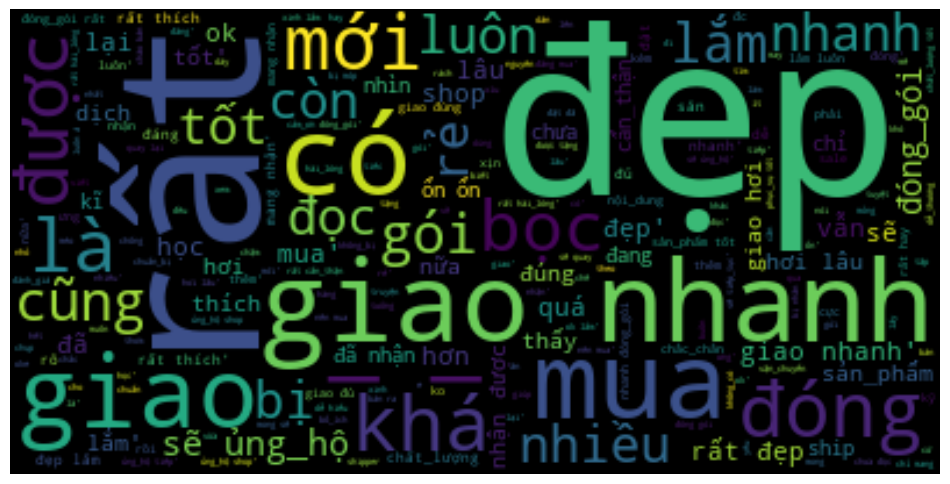

In [131]:
plt.figure(figsize=(12, 12)) 
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

In [132]:
wc_not_like = WordCloud(background_color='black', max_words=1000)
wc_not_like.generate(str(df_not_like['user_comment'].values))

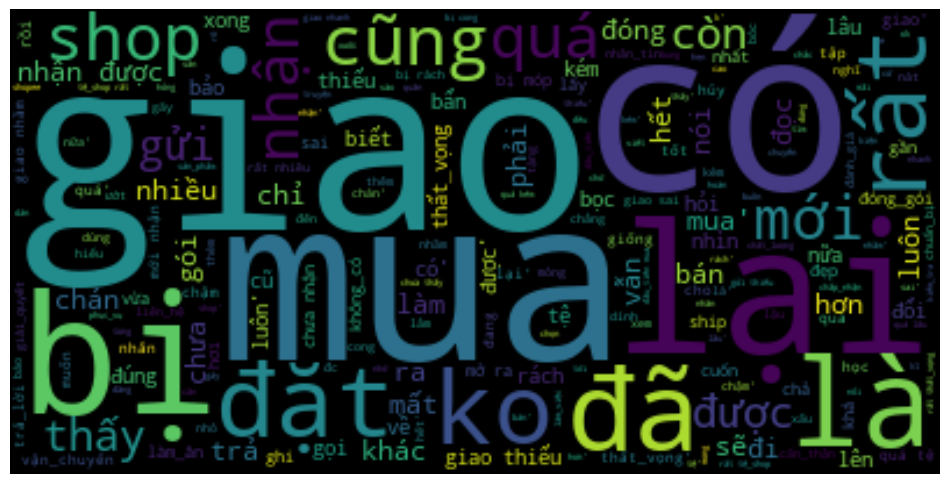

In [133]:
plt.figure(figsize=(12, 12)) 
plt.imshow(wc_not_like, interpolation='bilinear')
plt.axis('off')
plt.show()

### Build Model

#### Split into input/output

In [120]:
X = df['user_comment']

In [121]:
X.head()

0     rất thích cũng rất hợp_tác cảm_ơn shop rất nhiều
1                           rất xinh đáng mua trẻ nghe
2    kiến_thức dễ hiểu tuy_nhiên giao khá lâu vẫn c...
3                                 giao lâu bị cong gãy
4                            đẹp lắm giao đúng tot mua
Name: user_comment, dtype: object

In [122]:
y = df['label']

In [123]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

#### Split into train/test 

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [125]:
X_train.head()

669                  giao tốt sẽ còn mua nhiều
500                                       đóng
430                                           
791    mới đẹp không_phải chống cũng không_mỏi
606            đẹp lắm bọc bị quăn dập ưnggggg
Name: user_comment, dtype: object

#### Init pipeline for transform and training

In [139]:
pipe_line = Pipeline([
                ("tfidf", TfidfVectorizer()), # tf-idf
                ("clf", LogisticRegression ()) # model naive bayes
            ])

In [140]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [141]:
pipe_line.score(X_train, y_train)

0.9486133768352365

In [142]:
pipe_line.score(X_test, y_test)

0.8745247148288974

In [143]:
y_pred = pipe_line.predict(X_test)

### Evaluate result

In [144]:
confusion_matrix(y_test, y_pred)

array([[207,  38],
       [ 28, 253]])

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       245
           1       0.87      0.90      0.88       281

    accuracy                           0.87       526
   macro avg       0.88      0.87      0.87       526
weighted avg       0.87      0.87      0.87       526



Nhận xét:
- Class 0 (User not like): 
    + Dự đoán đúng 207, dự đoán sai 38 (not-like nhưng thành like)
    + Mô hình có thể không phát hiện lớp tốt nhưng cũng đáng tin cậy khi nó thực hiện
- Class 1 (User like): 
    + Dự đoán đúng 253, dự đoán sai 28 (like nhưng thành not-like)
    + Lớp được phát hiện tốt nhưng độ chính xác không quá tin cậy

In [146]:
# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_pred) 
print('AUC: %.3f' % auc)

AUC: 0.873


In [147]:
# Calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred)

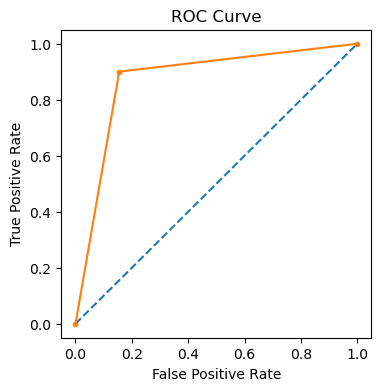

In [148]:
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle= '--') 
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.show()